In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Chargement du dataset
file_path = 'C:/Users/Dell/Documents/PortofolioProject/PYTHON PROJECT/Call-Center-Sentiment-Data-for-Analysis.xlsx'


In [17]:
# Vérifier les noms des feuilles pour comprendre la structure du fichier Excel
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

In [10]:
print(sheet_names)

['Call Center Data']


In [19]:
# Charger les données de la feuille identifiée
df = pd.read_excel(file_path, sheet_name='Call Center Data')

In [14]:
# Afficher les premières lignes du dataset pour comprendre sa structure
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       70 non-null     object        
 1   Customer Name            70 non-null     object        
 2   Sentiment                70 non-null     object        
 3   CSAT Score               70 non-null     int64         
 4   Call Timestamp           70 non-null     datetime64[ns]
 5   Reason                   70 non-null     object        
 6   City                     70 non-null     object        
 7   State                    70 non-null     object        
 8   Channel                  70 non-null     object        
 9   Response Time            70 non-null     object        
 10  Call Duration (Minutes)  70 non-null     int64         
 11  Call Center              70 non-null     object        
dtypes: datetime64[ns](1), int64(2), object

In [20]:
# Statistiques récapitulatives pour les variables numériques
numerical_summary = df.describe()
print(numerical_summary)

       CSAT Score                 Call Timestamp  Call Duration (Minutes)
count   70.000000                             70                70.000000
mean     5.328571  2024-01-16 08:34:17.142857216                26.257143
min      1.000000            2024-01-01 00:00:00                 6.000000
25%      3.000000            2024-01-08 00:00:00                14.000000
50%      5.000000            2024-01-16 12:00:00                29.500000
75%      7.000000            2024-01-24 00:00:00                36.000000
max     10.000000            2024-01-31 00:00:00                45.000000
std      2.387901                            NaN                12.576359


In [22]:
# Statistiques récapitulatives pour les colonnes catégorielles
categorical_summary = df.describe(include=['object'])
print(categorical_summary)

                  ID      Customer Name Sentiment            Reason  \
count             70                 70        70                70   
unique            70                 70         5                 3   
top     PIS-39858047  Frances Gullefant  Negative  Billing Question   
freq               1                  1        29                50   

               City  State      Channel Response Time     Call Center  
count            70     70           70            70              70  
unique           57     29            4             3               4  
top     Minneapolis  Texas  Call-Center    Within SLA  Los Angeles/CA  
freq              3      9           23            53              30  


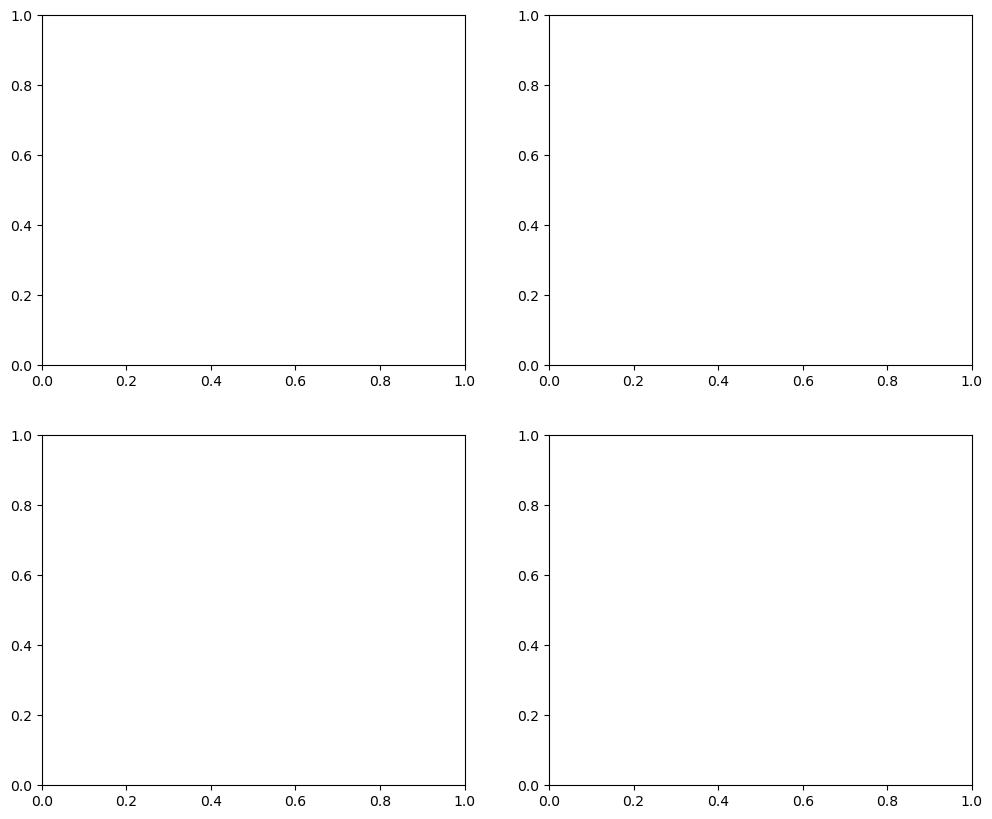

In [24]:
# Analyse de la distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

In [26]:
# Histogramme du score CSAT
axes[0, 0].hist(df['CSAT Score'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('CSAT Score Distribution')
axes[0, 0].set_xlabel('CSAT Score')
axes[0, 0].set_ylabel('Frequency')

Text(4.444444444444452, 0.5, 'Frequency')

In [28]:
# Boxplot du score CSAT
axes[0, 1].boxplot(df['CSAT Score'], vert=False, patch_artist=True)
axes[0, 1].set_title('CSAT Score Boxplot')
axes[0, 1].set_xlabel('CSAT Score')

Text(0.5, 424.44444444444446, 'CSAT Score')

In [30]:
# Histogramme pour la durée de l'appel
axes[1, 0].hist(df['Call Duration (Minutes)'], bins=10, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Call Duration Distribution')
axes[1, 0].set_xlabel('Call Duration (Minutes)')
axes[1, 0].set_ylabel('Frequency')

Text(4.444444444444452, 0.5, 'Frequency')

In [32]:
# Boxplot pour la durée de l'appel
axes[1, 1].boxplot(df['Call Duration (Minutes)'], vert=False, patch_artist=True)
axes[1, 1].set_title('Call Duration Boxplot')
axes[1, 1].set_xlabel('Call Duration (Minutes)')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

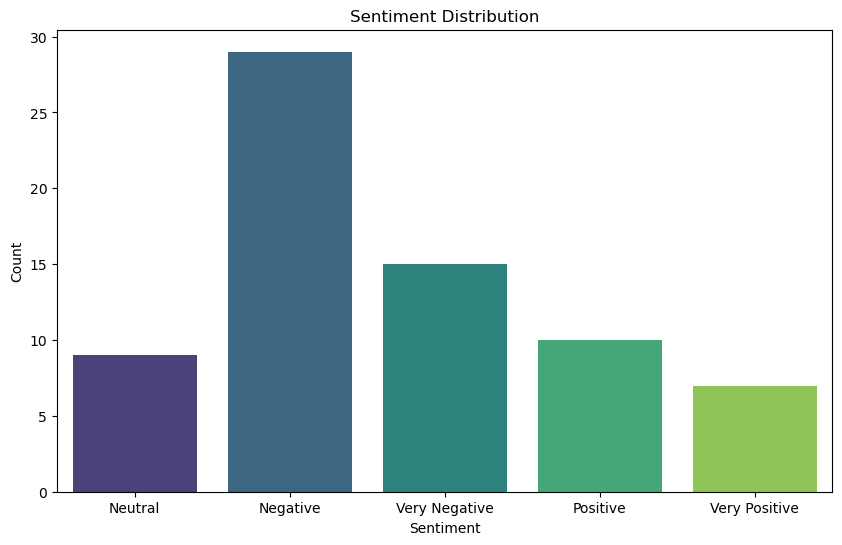

In [36]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', hue='Sentiment', data=df, palette='viridis', legend=False)
plt.title('Distribution du sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

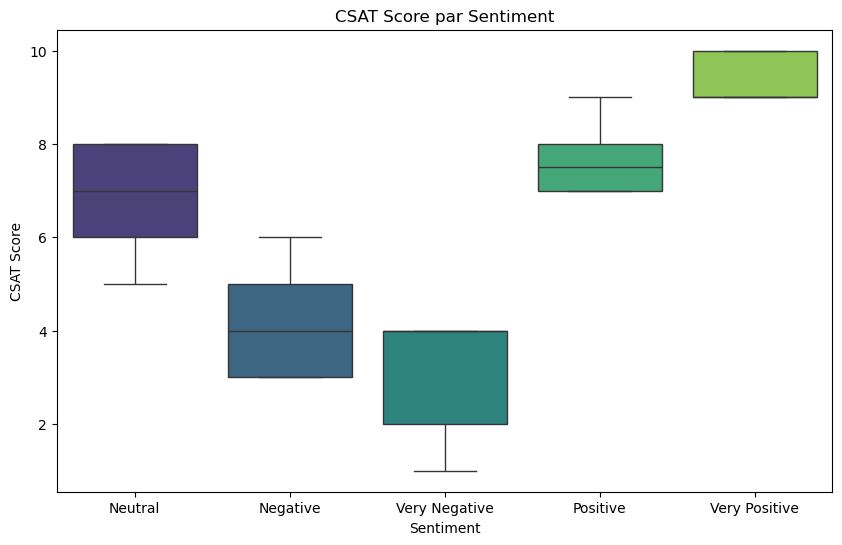

In [79]:
# Boxplot pour le score CSAT par sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment',  hue='Sentiment', y='CSAT Score', data=df, palette='viridis')
plt.title('CSAT Score par Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('CSAT Score')
plt.show()

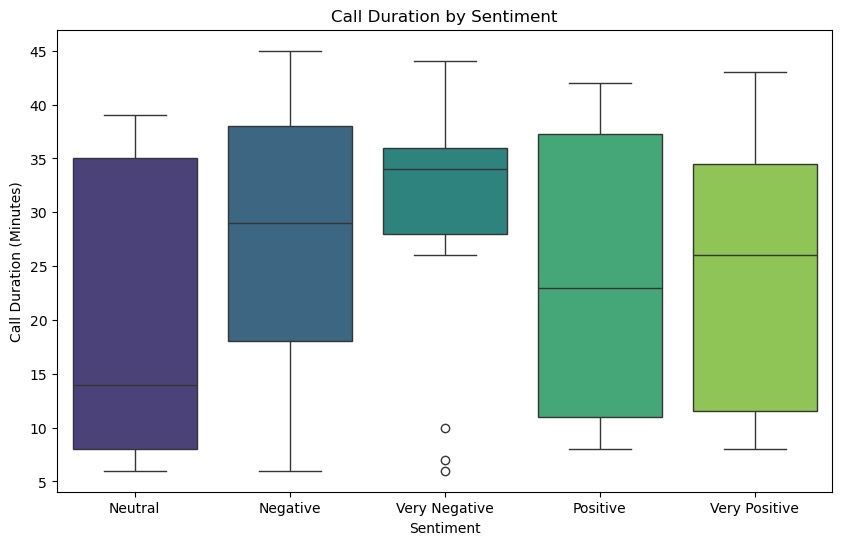

In [43]:
# Boxplot pour la durée de l'appel par sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', hue='Sentiment', y='Call Duration (Minutes)', data=df, palette='viridis')
plt.title('Call Duration par Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Call Duration (Minutes)')
plt.show()

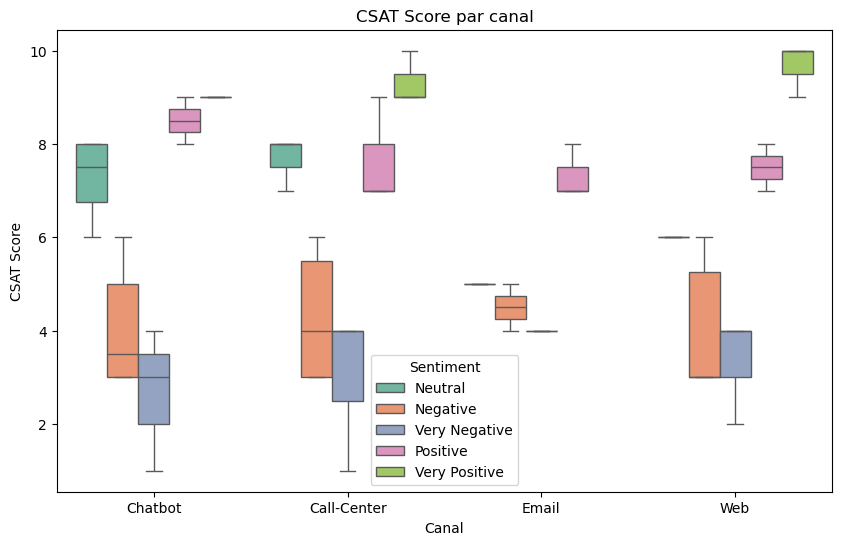

In [21]:
# Boxplot pour le score CSAT par canal
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel', hue='Sentiment', y='CSAT Score', data=df, palette='Set2')
plt.title('CSAT Score par canal')
plt.xlabel('Canal')
plt.ylabel('CSAT Score')
plt.show()

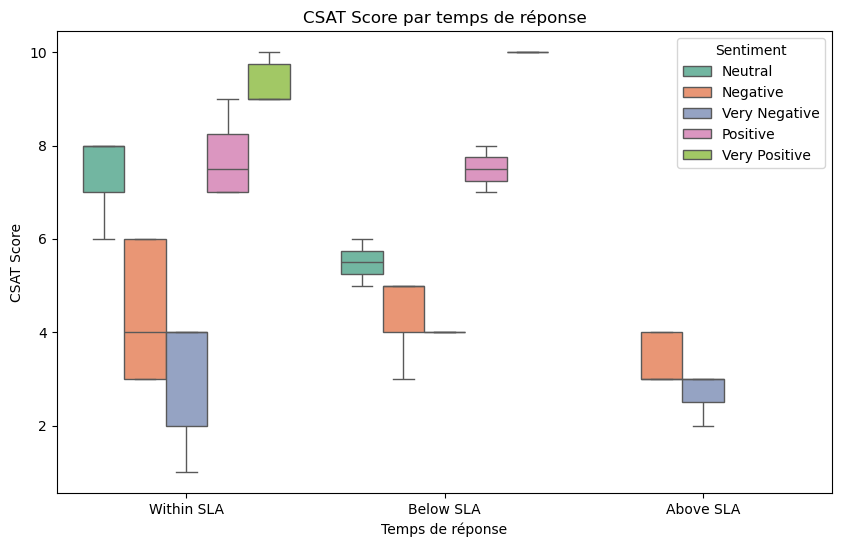

In [23]:
# Boxplot pour le score CSAT par temps de réponse
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response Time', hue='Sentiment', y='CSAT Score', data=df, palette='Set2')
plt.title('CSAT Score par temps de réponse')
plt.xlabel('Temps de réponse')
plt.ylabel('CSAT Score')
plt.show()

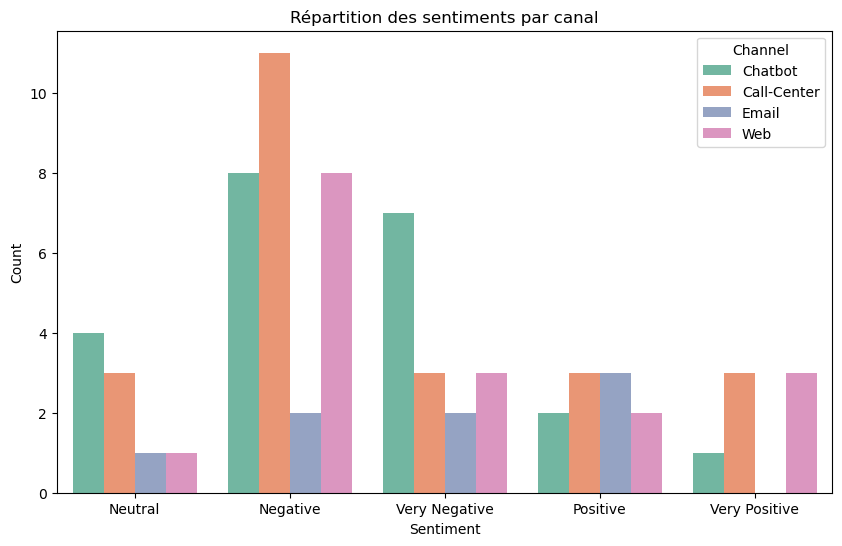

In [25]:
# Boxplot for Sentiment by Channel
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', hue='Channel', data=df, palette='Set2')
plt.title('Répartition des sentiments par canal')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [55]:
# Analyse de corrélation
# Encodez numériquement la variable Sentiment pour l'analyse de corrélation
sentiment_mapping = {
    "Very Negative": 1,
    "Negative": 2,
    "Neutral": 3,
    "Positive": 4,
    "Very Positive": 5
}

In [57]:
df['Sentiment Score'] = df['Sentiment'].map(sentiment_mapping)

# Calculer la matrice de corrélation pour les variables pertinentes
correlation_matrix = df[['CSAT Score', 'Call Duration (Minutes)', 'Sentiment Score']].corr()

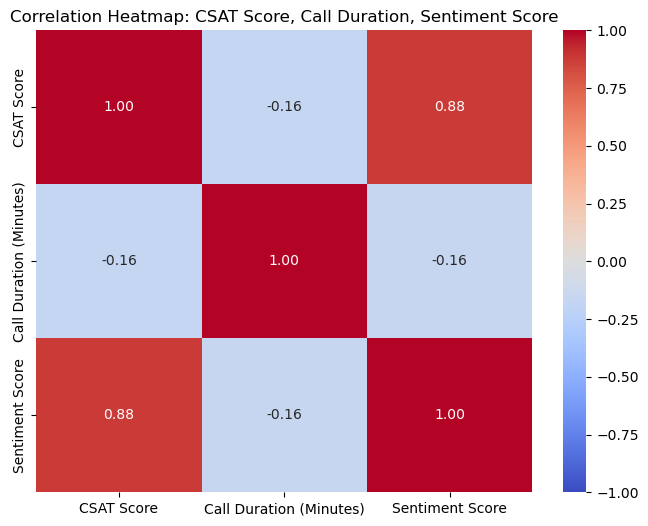

In [59]:
# Visualisation 1 : Carte thermique de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap: CSAT Score, Call Duration, Sentiment Score')
plt.show()

In [61]:
# Enquête sur les tendances en matière de délais de réponse
response_time_group = df.groupby('Response Time').agg({
    'CSAT Score': ['mean', 'std'],
    'Sentiment Score': ['mean', 'std'],
    'Call Duration (Minutes)': ['mean', 'std'],
    'ID': 'count'
}).reset_index()

In [63]:
# Aplatir les colonnes à plusieurs niveaux
response_time_group.columns = ['Response Time', 'Avg CSAT Score', 'CSAT Std Dev', 
                               'Avg Sentiment Score', 'Sentiment Std Dev', 
                               'Avg Call Duration (Minutes)', 'Duration Std Dev', 'Count']

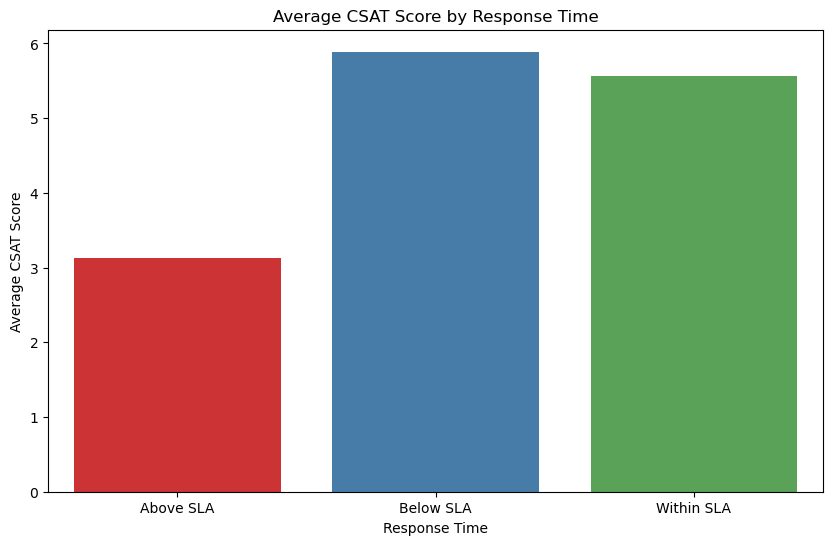

In [67]:
# Graphique à barres pour le score CSAT moyen par temps de réponse
plt.figure(figsize=(10, 6))
sns.barplot(x='Response Time', hue='Response Time', y='Avg CSAT Score', data=response_time_group, palette='Set1')
plt.title('score CSAT moyen par temps de réponse')
plt.xlabel('temps de réponse)
plt.ylabel('score CSAT moyen')
plt.show()

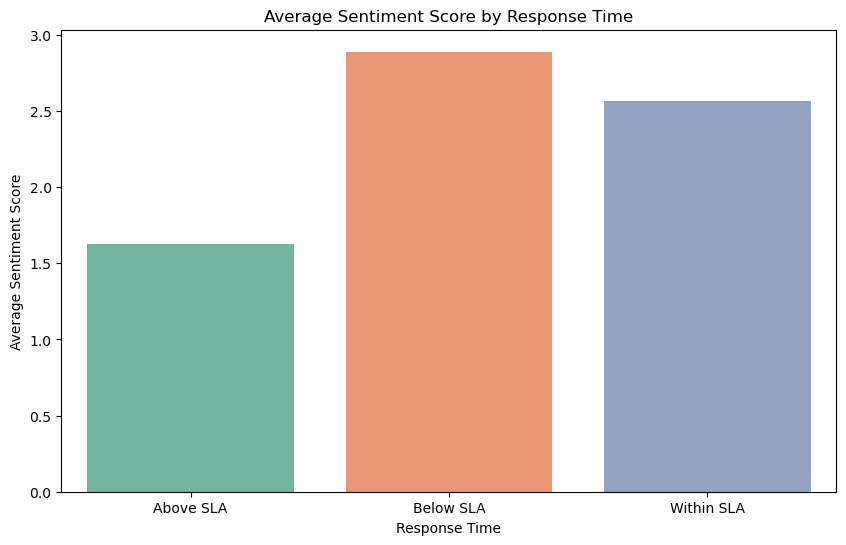

In [69]:
# Graphique à barres pour le score de sentiment moyen par temps de réponse
plt.figure(figsize=(10, 6))
sns.barplot(x='Response Time', hue='Response Time', y='Avg Sentiment Score', data=response_time_group, palette='Set2')
plt.title('score de sentiment moyen par temps de réponse')
plt.xlabel('temps de réponse')
plt.ylabel('score de sentiment moyen')
plt.show()

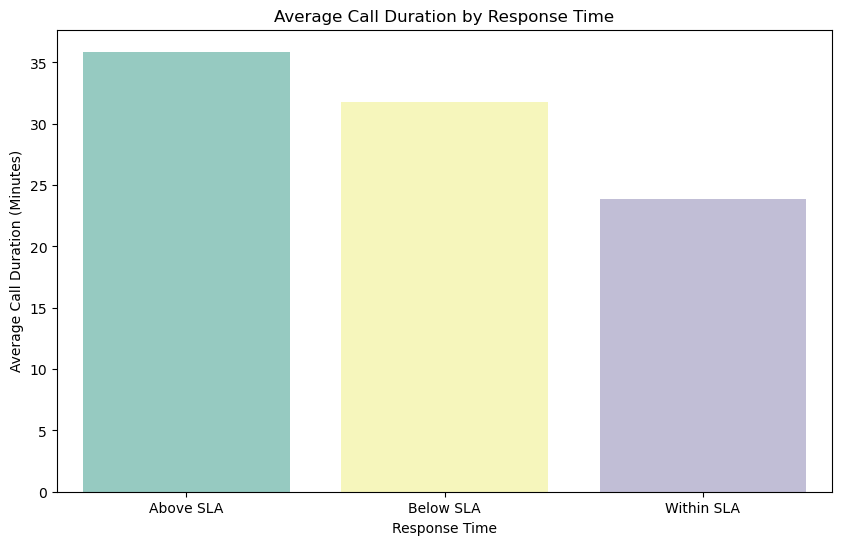

In [73]:
# Bar plot for Average Call Duration by Response Time
plt.figure(figsize=(10, 6))
sns.barplot(x='Response Time', hue='Response Time', y='Avg Call Duration (Minutes)', data=response_time_group, palette='Set3')
plt.title('Durée moyenne des appels par temps de réponse')
plt.xlabel('temps de réponse')
plt.ylabel('Durée moyenne des appels (minutes)')
plt.show()

In [75]:
# Analyse des séries chronologiques
time_series_data = df.resample('D', on='Call Timestamp').agg({
    'CSAT Score': 'mean',
    'Sentiment Score': 'mean'
}).reset_index()


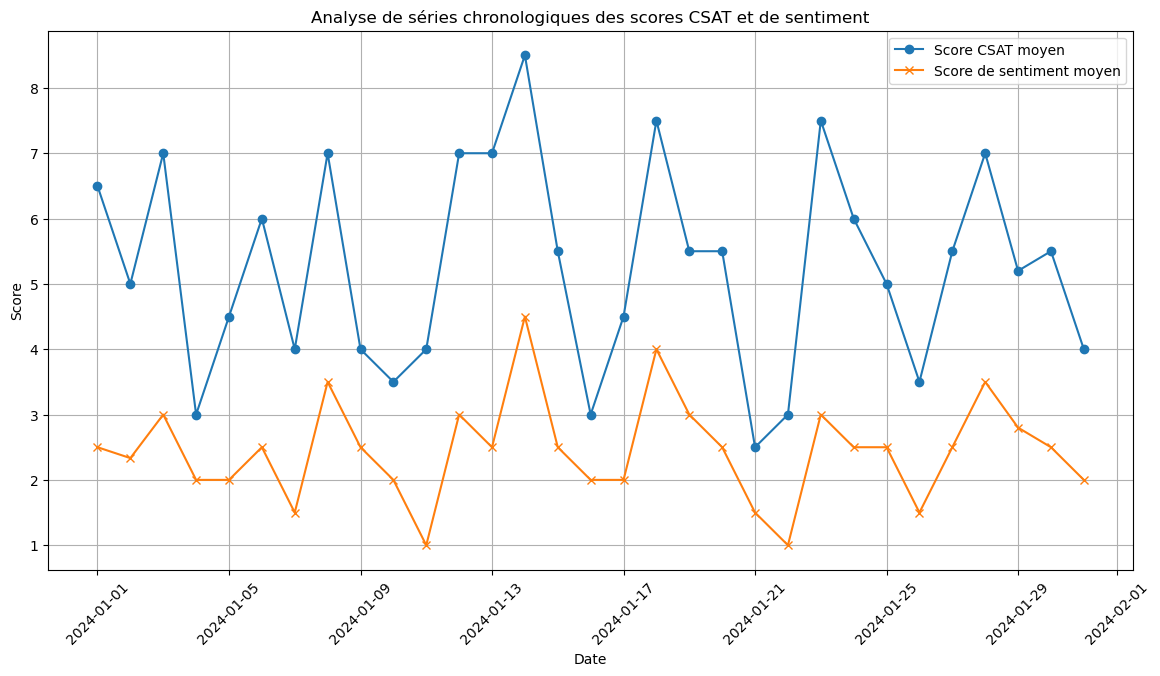

In [83]:
# Tracée les données de séries chronologiques
plt.figure(figsize=(14, 7))
plt.plot(time_series_data['Call Timestamp'], time_series_data['CSAT Score'], marker='o', label='Score CSAT moyen')
plt.plot(time_series_data['Call Timestamp'], time_series_data['Sentiment Score'], marker='x', label='Score de sentiment moyen')
plt.title('Analyse de séries chronologiques des scores CSAT et de sentiment')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()